# Check cell type distribution per sample

This notebook plots the hisogram for each cell type accross samples.

In [1]:
# Import packages
import athena as ath
import numpy as np

# Loead data
so = ath.dataset.imc()

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
# Get sample ids
sample_ids = so.spl.index.values

In [2]:
so.spl

,pid,location,grade,tumor_type,tumor_size,gender,menopausal,PTNM_M,age,Patientstatus,...,MIC,Count_Cells,Height_FullStack,Width_FullStack,area,Subtype,HER2,ER,PR,clinical_type
core,,,,,,,,,,,,,,,,,,,,,
slide_49_By3x1,49,[],2,[],NaN,FEMALE,POST,M0,59,[],...,NaN,1534,426,539,229614,PR+ER+,-,+,+,HR+HER2-
slide_53_By11x8,53,PERIPHERY,2,INVASIVE_LOBULAR,50.0,FEMALE,POST,M1,52,[],...,NaN,1783,482,533,256906,PR+ER+,NaN,NaN,NaN,NaN
slide_62_By9x5,62,[],2,[],NaN,FEMALE,POST,M0,58,[],...,NaN,53,503,478,240434,PR+ER+,-,+,+,HR+HER2-
slide_50_Ay11x2,50,CENTER,1,INVASIVE_DUCTAL,22.0,FEMALE,POST,M1,51,[],...,NaN,1661,466,593,276338,PR+ER-,-,+,+,HR+HER2-
slide_58_By5x7,58,[],2,[],NaN,FEMALE,POST,M0,57,[],...,NaN,71,482,433,208706,PR-ER+,-,+,+,HR+HER2-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
slide_10_By10x7,10,PERIPHERY,2,INVASIVE_LOBULAR,40.0,FEMALE,POST,M1,56,[],...,NaN,1331,473,524,247852,PR+ER+,NaN,NaN,NaN,NaN
slide_11_By6x1,11,CENTER,2,INVASIVE_DUCTAL,25.0,FEMALE,POST,M0,55,[],...,NaN,627,463,491,227333,PR+ER+,-,+,+,HR+HER2-
slide_15_By13x7,15,CENTER,2,INVASIVE_LOBULAR,38.0,FEMALE,POST,M1,59,[],...,NaN,617,453,452,204756,PR+ER+,-,+,+,HR+HER2-


In [3]:
so.obs[sample_ids[0]]

,core,meta_id,meta_label,cell_type_id,cell_type,phenograph_cluster,CellId,id
cell_id,,,,,,,,
1,slide_49_By3x1,1,B cells,1,immune,5,1,ZTMA208_slide_49_By3x1_1
2,slide_49_By3x1,1,B cells,1,immune,5,2,ZTMA208_slide_49_By3x1_2
3,slide_49_By3x1,1,B cells,1,immune,5,3,ZTMA208_slide_49_By3x1_3
4,slide_49_By3x1,2,B and T cells,1,immune,18,4,ZTMA208_slide_49_By3x1_4
5,slide_49_By3x1,3,T cell,1,immune,1,5,ZTMA208_slide_49_By3x1_5
...,...,...,...,...,...,...,...,...
1530,slide_49_By3x1,21,Epithelial low,4,tumor,8,1480,ZTMA208_slide_49_By3x1_1480
1531,slide_49_By3x1,3,T cell,1,immune,1,1481,ZTMA208_slide_49_By3x1_1481
1532,slide_49_By3x1,11,Fibronectin Hi,3,stromal,2,1482,ZTMA208_slide_49_By3x1_1482


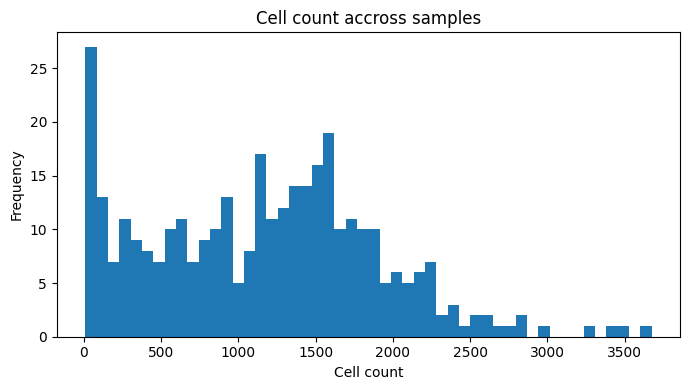

In [60]:
# Creating histogram
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1,
                        figsize =(7, 4),
                        tight_layout = True)
 
axs.hist(so.spl["Count_Cells"], bins = 50)

plt.xlabel("Cell count")
plt.ylabel("Frequency")
plt.title('Cell count accross samples')
 
# Show plot
plt.show()

In [34]:
# How many samples have under 10 cells?
under_10 = so.spl["Count_Cells"] <= 10
under_10.sum()

1

## Plot cell type distributions

In [49]:
# Get unique cell types accross samples
cell_types = np.empty(0)

for sample in sample_ids:
    cell_types_in_sample = so.obs[sample_ids[0]]["cell_type"].cat.categories.values
    cell_types = np.append(cell_types, cell_types_in_sample)

unique_cell_types = np.unique(cell_types)
unique_cell_types

array(['endothelial', 'immune', 'myoepithelial', 'stromal', 'tumor'],
      dtype=object)

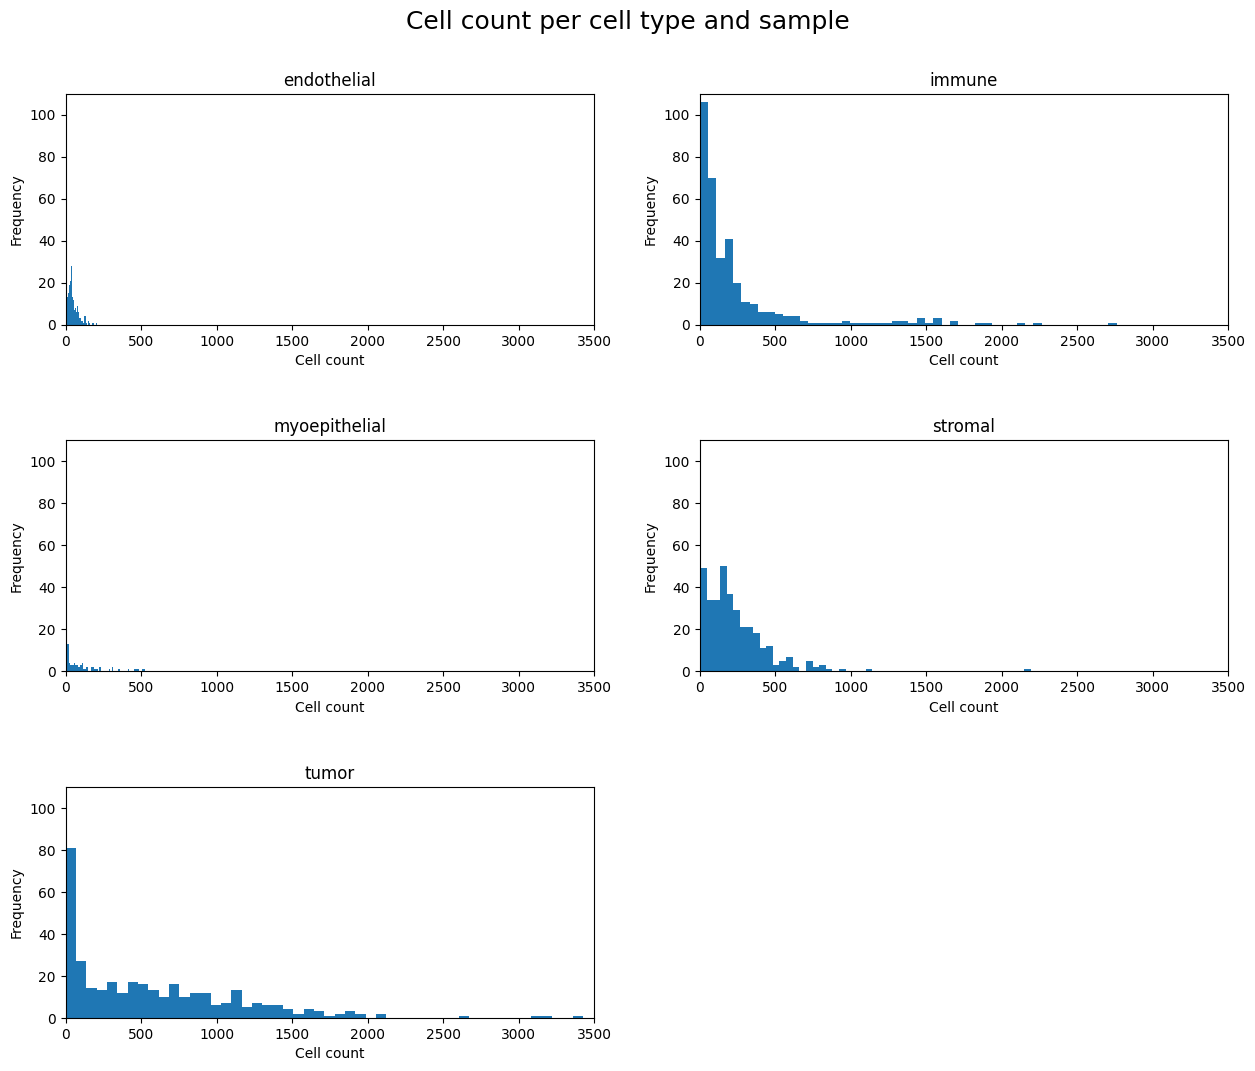

In [76]:
# Plot distributions
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Cell count per cell type and sample", fontsize=18, y=0.95)

for n, cell_type in enumerate(unique_cell_types):
    # add a new subplot iteratively
    axs = plt.subplot(3, 2, n + 1)

    cell_contus_per_sample = []
    for sample_id in sample_ids:
        cell_count = so.obs[sample_id]["cell_type"] == cell_type
        cell_contus_per_sample.append(cell_count.sum())
 
    axs.hist(cell_contus_per_sample, bins = 50)
    axs.set_xlim(0, 3500)
    axs.set_ylim(0, 110)

    plt.xlabel("Cell count")
    plt.ylabel("Frequency")
    plt.title(f'{cell_type}')

plt.show()

### How many samples have more than 10 cells of each cell type?

In [74]:
counter = 0

wo_myo_endo = list(unique_cell_types)
wo_myo_endo.remove("myoepithelial")
wo_myo_endo.remove("stromal")

use_this_cell_types = wo_myo_endo

# use_this_cell_types = unique_cell_types

for sample_id in sample_ids:
    all_above_10 = True

    for cell_type in use_this_cell_types:
        cell_count = so.obs[sample_id]["cell_type"] == cell_type
        if cell_count.sum() <= 10:
            all_above_10 = False
    
    if all_above_10:
        counter = counter + 1
 
counter

258

### Results

- Only 55 samples have more that 10 cell of each type (out of 347, appx. 15%). 
- Mainly becasue of "myoepithelial" cells. Without considering this cell type 255 (73%) samples have more than 10 cells of each cell type. 
- W/o endothelial and myoepithelial cells the count goes up to 283.
- W/o stromal and myoepithelial cells the count goes up to 258.

Therefore for the test case we will use all cell types except myoepithelial.